In [1]:
import torch
import torchvision
from torchvision import transforms,datasets



In [20]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [21]:
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

shuffle=True is to shuffle the dataset


In [22]:
trainset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [23]:
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [24]:

import torch.nn as nn
import torch.nn.functional as F

In [32]:
class Net(nn.Module):
  def __init__(self):

    super().__init__()
    self.fc1=nn.Linear(28*28,64)     #28*28 is the input image of original size
    self.fc2=nn.Linear(64,64)
    self.fc3=nn.Linear(64,64)
    self.fc4=nn.Linear(64,10)  #if we donot define forward layer the nn will simply pass through 

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.fc4(x)
    return F.log_softmax(x,dim=1)
    return x



net=Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [33]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)
EPOCH=3

for epoch in range(EPOCH):
  for data in trainset:
    X,y=data
    net.zero_grad()
    output=net(X.view(-1,28*28))
    loss=F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)

    


tensor(0.1262, grad_fn=<NllLossBackward>)
tensor(0.0025, grad_fn=<NllLossBackward>)
tensor(0.0134, grad_fn=<NllLossBackward>)


In [35]:
correct=0
total=0

with torch.no_grad():
  for data in trainset:
    X,y=data
    output=net(X.view(-1,784))
    for idx,i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct+=1
      total+=1
print("accuracy: ",round(correct/total,3))

accuracy:  0.977


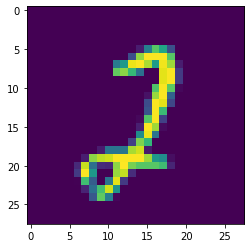

In [46]:
import matplotlib.pyplot as plt 
plt.imshow(X[5].view(28,28))
plt.show()

In [48]:
print(torch.argmax(net(X[5].view(-1,784))[0]))

tensor(3, grad_fn=<NotImplemented>)
